In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/raw_data.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# check all the columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
# check the data types
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [6]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("Summary statistics:\n", df.describe())

Shape of the dataset: (19735, 29)
Missing values:
 date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64
Summary statistics:
          Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.

In [7]:
df.describe

<bound method NDFrame.describe of                       date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.

In [8]:
def preprocess_data(df):
    # Derive occupancy from lights (1 if lights > 0, else 0).
    df['Occupancy'] = df['lights'].apply(lambda x: 1 if x > 0 else 0)
    
    # Compute the average indoor temperature from columns T1 to T9.
    temp_cols = [f'T{i}' for i in range(1, 10)]
    df['Avg_T1_T9'] = df[temp_cols].mean(axis=1)
    
    # Compute HVAC energy consumption (Appliances minus lights).
    df['HVAC_energy'] = df['Appliances'] - df['lights']
    
    # Extract hour of day from the date column.
    df['date'] = pd.to_datetime(df['date'])
    df['Hour_of_day'] = df['date'].dt.hour
    
    # Forward-fill any missing values.
    df.ffill(inplace=True)
    return df

# Preprocess the dataset
df = preprocess_data(df)

In [9]:
# Display the first few rows of the processed dataset
print("\nProcessed dataset:")
print(df.head())


Processed dataset:
                 date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.730000  19.000000  ...    92.0   7.000000   63.000000        5.3   
1  19.79  44.790000  19.000000  ...    92.0   6.666667   59.166667        5.2   
2  19.79  44.933333  18.926667  ...    92.0   6.333333   55.333333        5.1   
3  19.79  45.000000  18.890000  ...    92.0   6.000000   51.500000        5.0   
4  19.79  45.000000  18.890000  ...    92.0   5.666667   47.666667        4.9   

         rv1

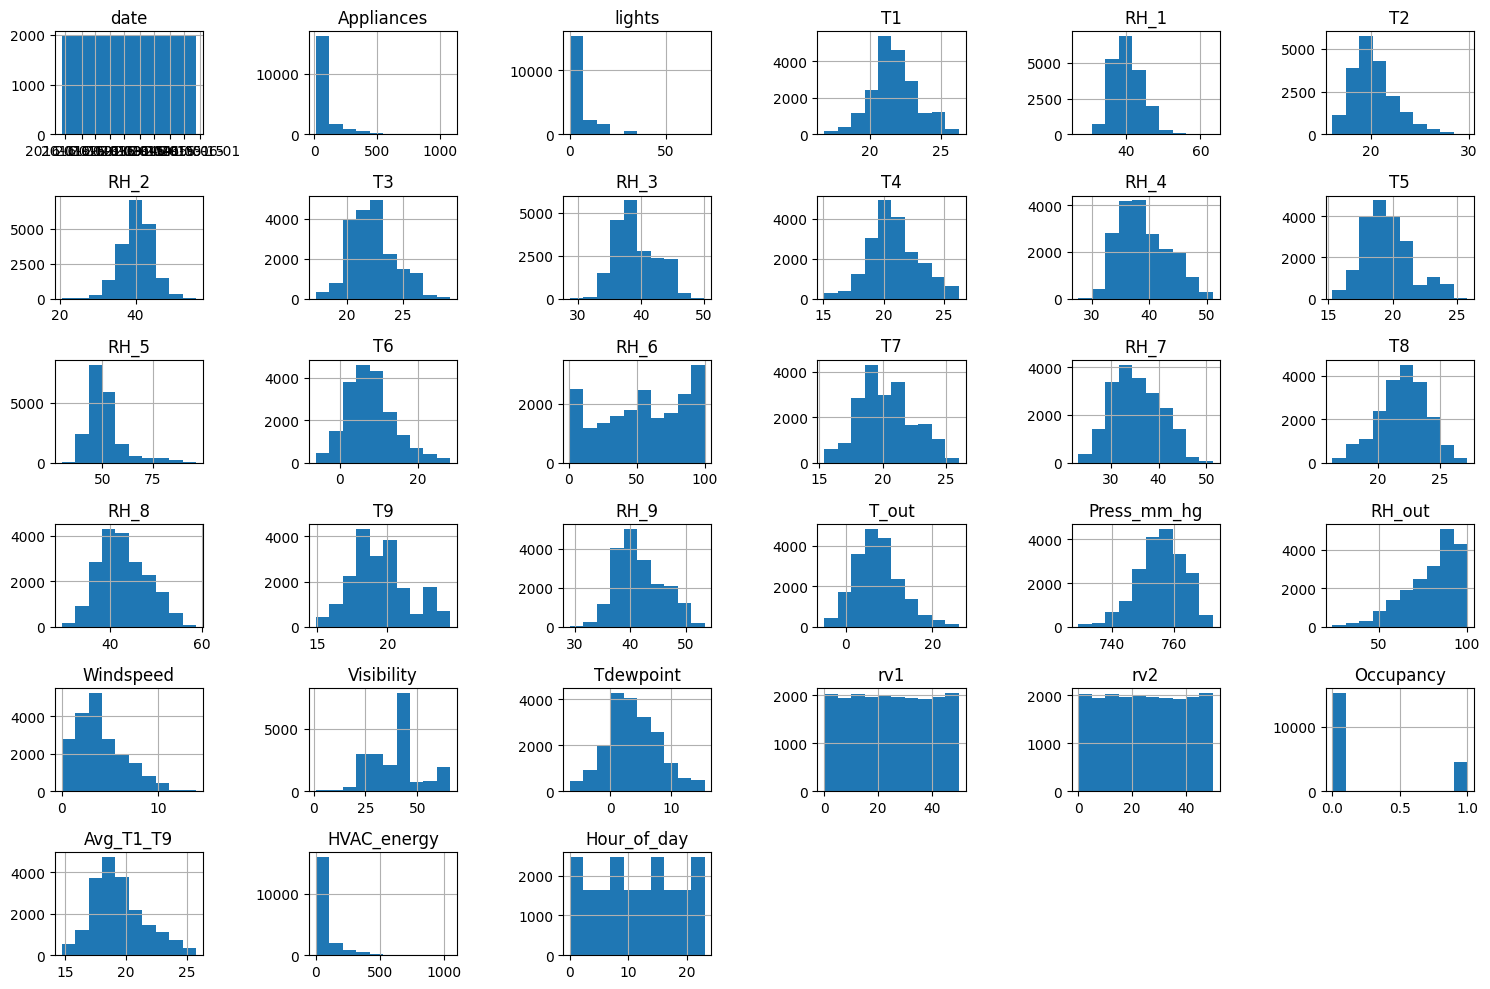

In [11]:
# Histogram for numerical columns
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

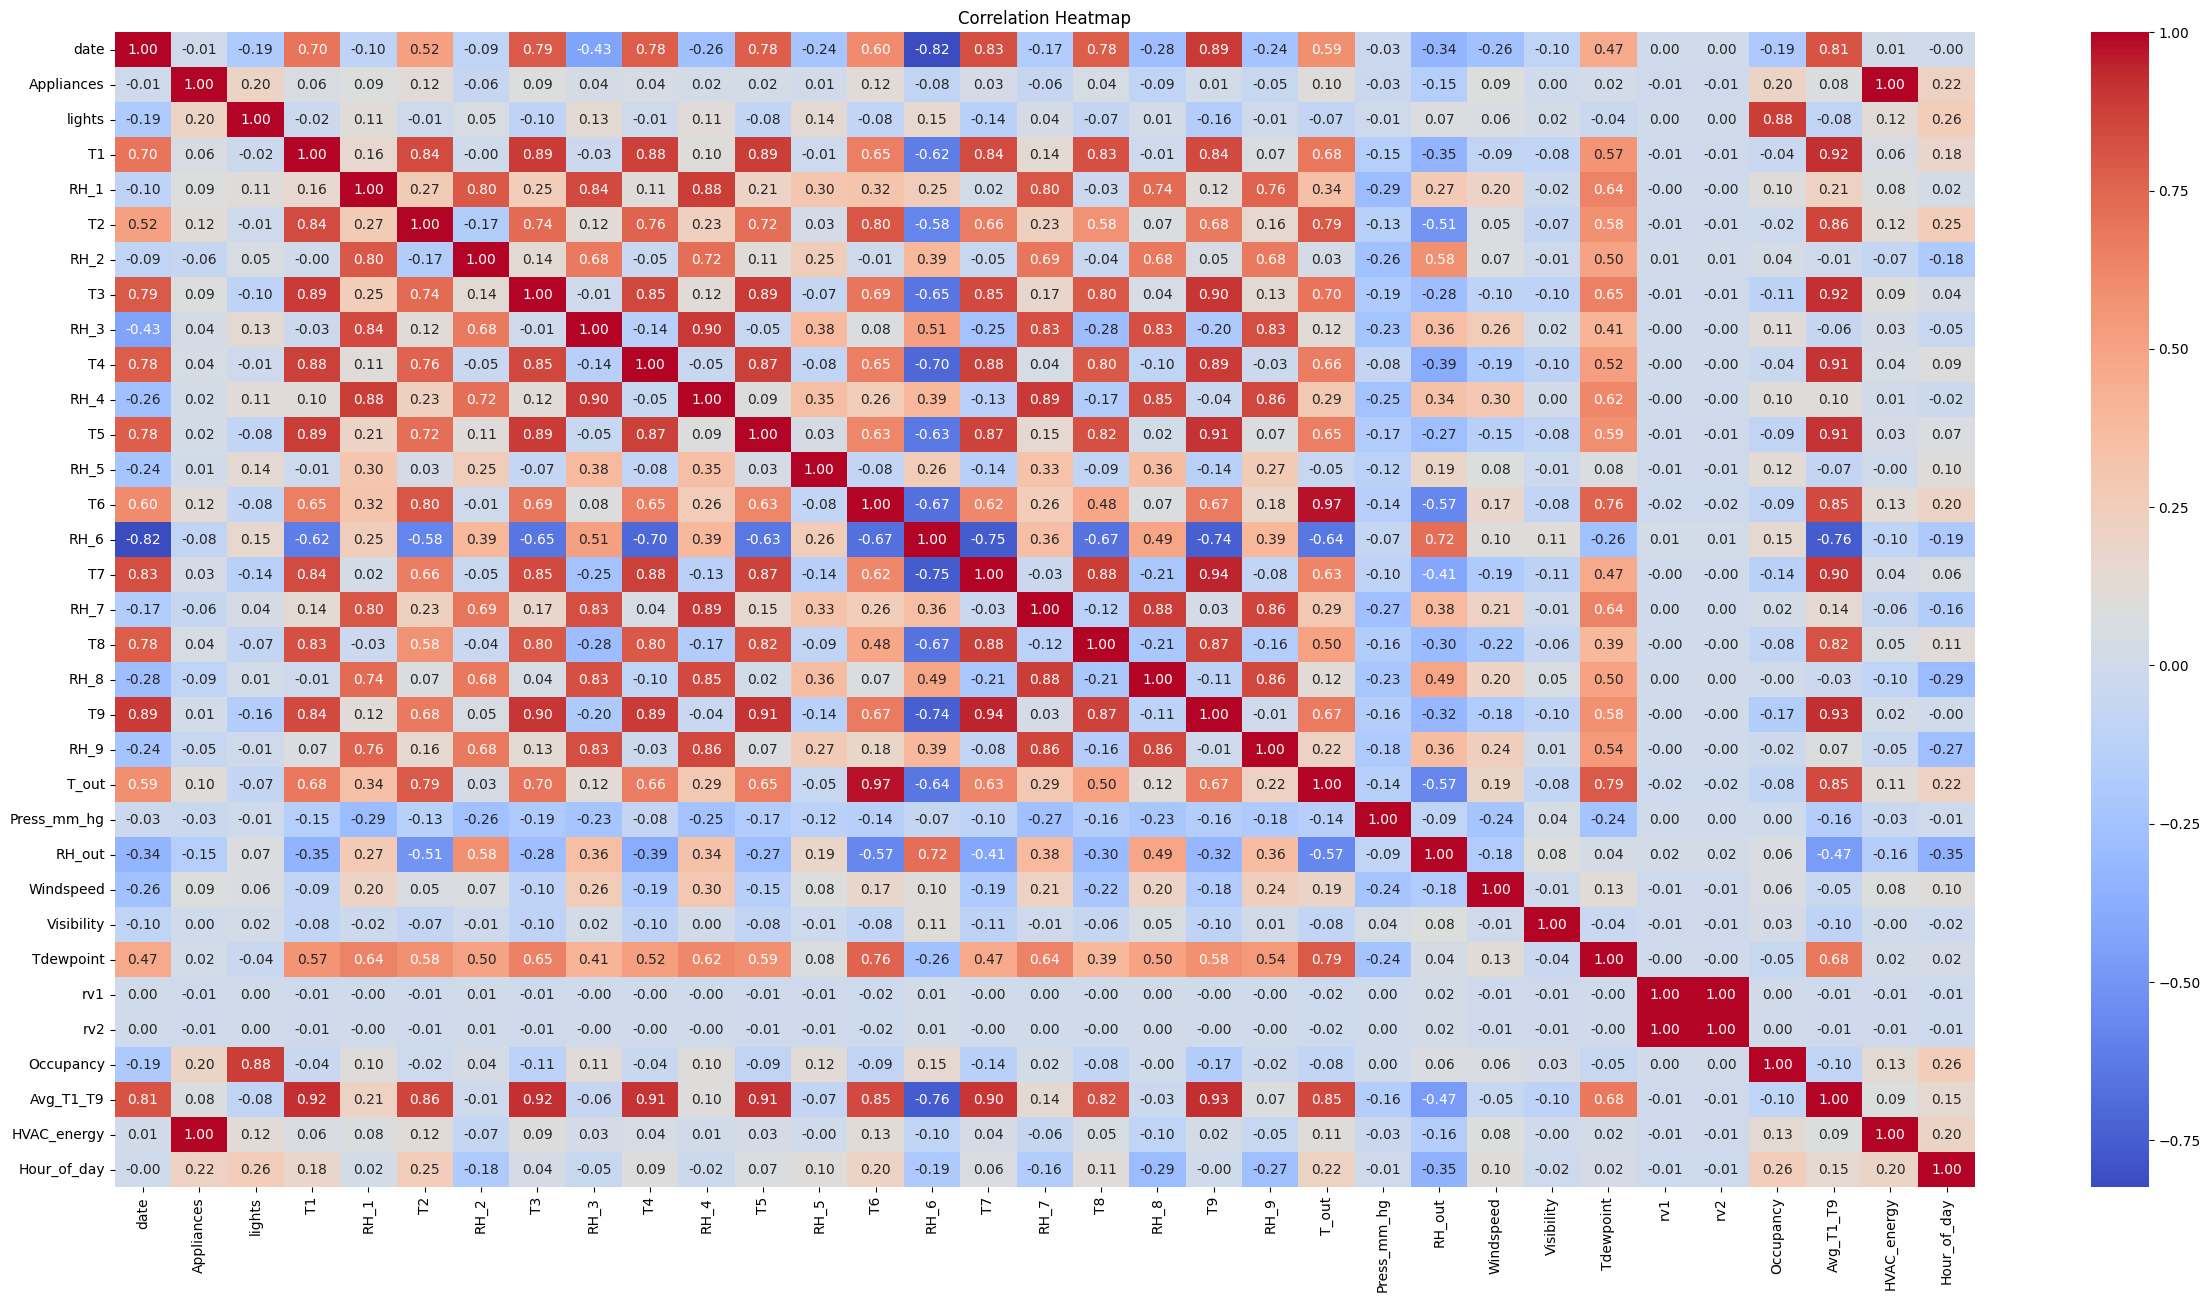

In [14]:
# Correlation heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

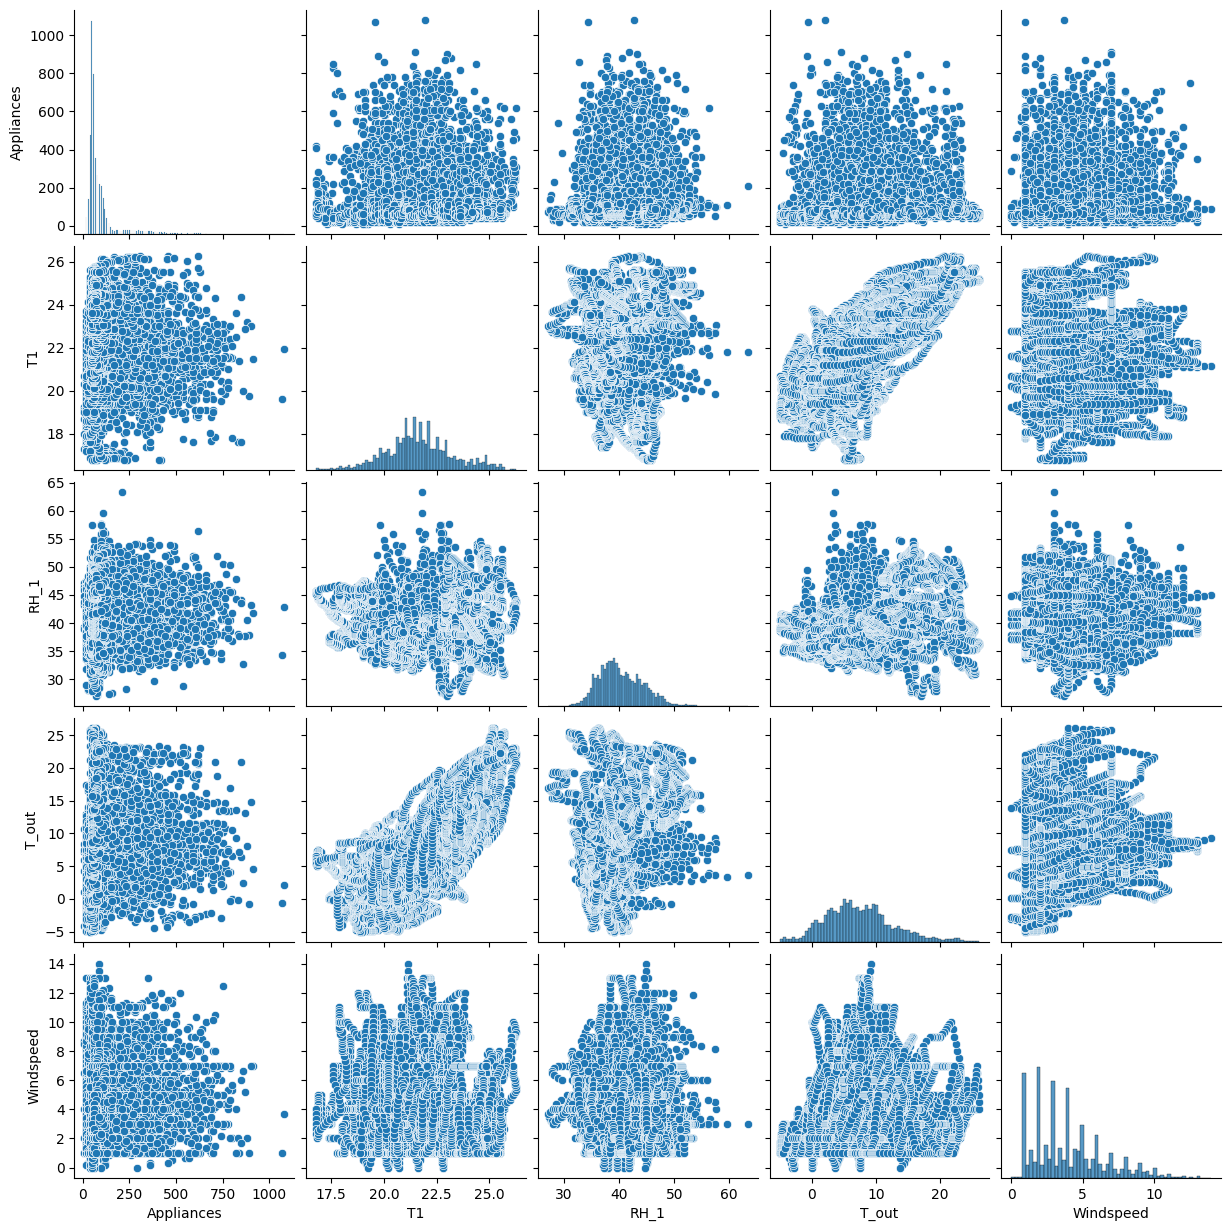

In [16]:
# Pairplot for selected features
selected_features = ['Appliances', 'T1', 'RH_1', 'T_out', 'Windspeed']
sns.pairplot(df[selected_features])
plt.show()

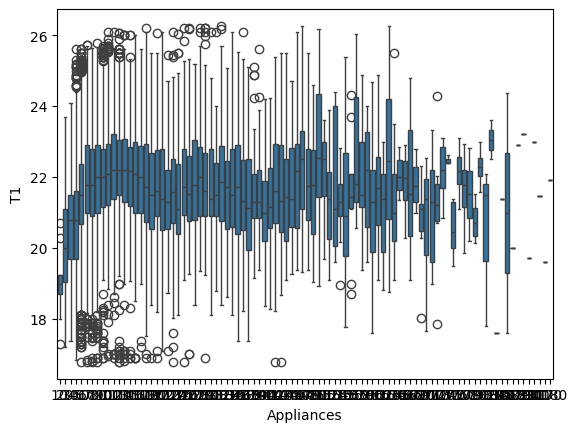

In [15]:
# Boxplot for Appliances vs. another feature
sns.boxplot(x='Appliances', y='T1', data=df)
plt.show()

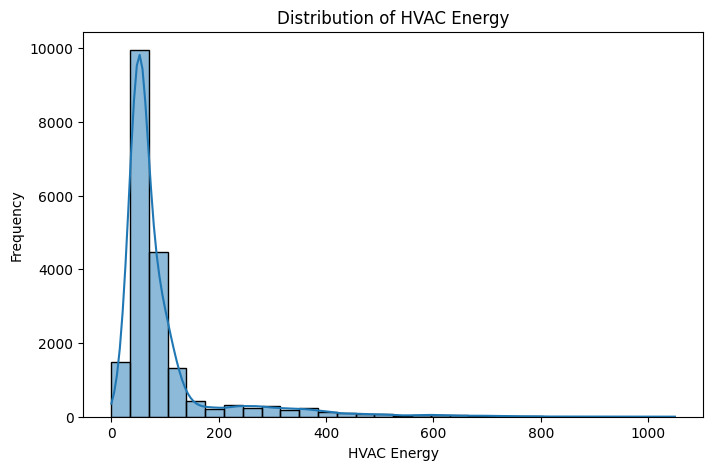

In [18]:
# Distribution of HVAC energy
plt.figure(figsize=(8, 5))
sns.histplot(df['HVAC_energy'], kde=True, bins=30)
plt.title("Distribution of HVAC Energy")
plt.xlabel("HVAC Energy")
plt.ylabel("Frequency")
plt.show()

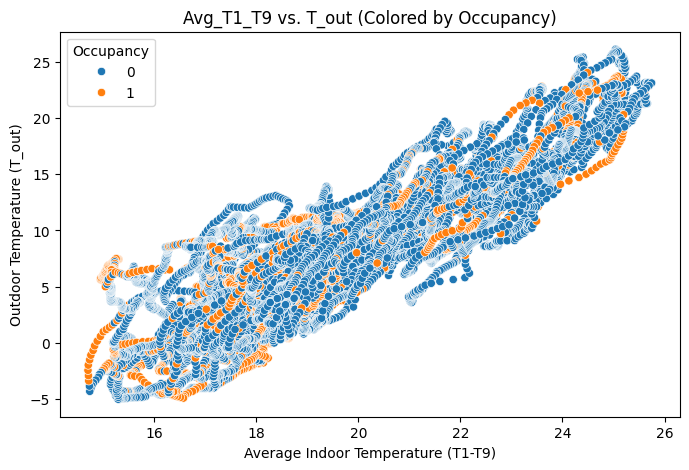

In [19]:
# Scatter plot of Avg_T1_T9 vs. T_out
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Avg_T1_T9', y='T_out', hue='Occupancy', data=df)
plt.title("Avg_T1_T9 vs. T_out (Colored by Occupancy)")
plt.xlabel("Average Indoor Temperature (T1-T9)")
plt.ylabel("Outdoor Temperature (T_out)")
plt.show()

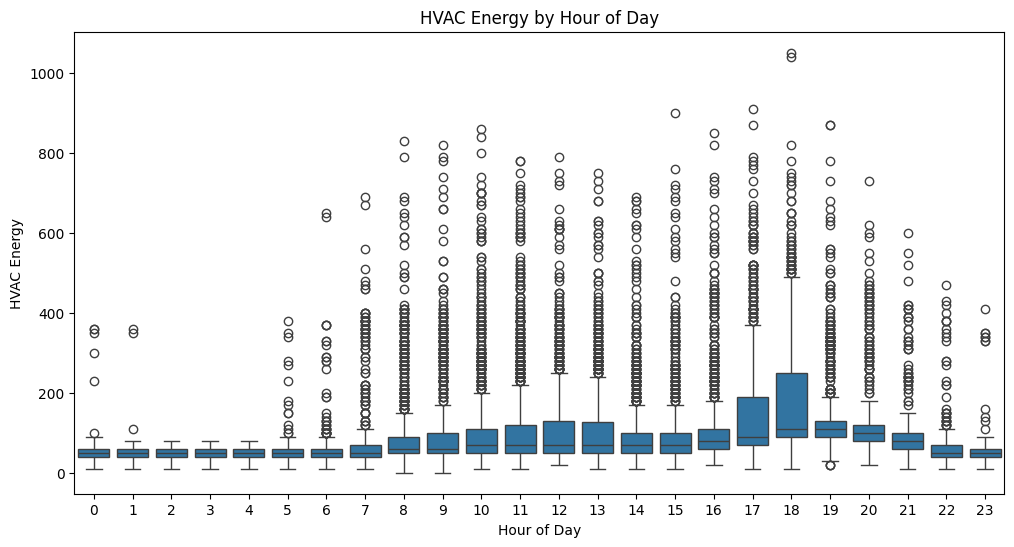

In [21]:
# Boxplot of HVAC energy by hour of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour_of_day', y='HVAC_energy', data=df)
plt.title("HVAC Energy by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("HVAC Energy")
plt.show()